# Semantic Alignment of fMRI Data Using CLIP

The goal of this project was to align brain responses collected through fMRI with semantic information derived from visual stimuli, using CLIP-based contrastive tuning. By leveraging the BOLD5000 dataset, which contains fMRI data collected from participants viewing a variety of images, the objective was to develop a model capable of aligning the semantic information from these images (represented as embeddings) with the neural responses captured in fMRI scans.

In [1]:
import scipy.io as sio

In [2]:
mat_file_path = '/content/drive/MyDrive/fMRI_Semantic/ROIs/ROIs/CSI1/mat/CSI1_ROIs_TR1.mat'

#### Load the contents of the MAT file
#### Inspect the variables in the MAT file

In [3]:
mat_contents = sio.loadmat(mat_file_path)

mat_variables = mat_contents.keys()

In [4]:
mat_variables

dict_keys(['__header__', '__version__', '__globals__', 'LHPPA', 'RHLOC', 'LHLOC', 'RHEarlyVis', 'RHRSC', 'RHOPA', 'RHPPA', 'LHEarlyVis', 'LHRSC', 'LHOPA'])

In [5]:
# Load the data for LHPPA (Left Hemisphere Parahippocampal Place Area)
lhppa_data = mat_contents['LHPPA']

# Check the shape of the LHPPA data to understand its structure
print("LHPPA Data Shape:", lhppa_data.shape)

# Inspect the first few entries in the LHPPA data
print("LHPPA Sample Data:", lhppa_data[:5])

LHPPA Data Shape: (5254, 131)
LHPPA Sample Data: [[-0.0079012  -0.00764776 -0.01865518 -0.02061323 -0.03112459  0.0012523
  -0.00463924 -0.04175296 -0.02175567 -0.03066114  0.00046372 -0.01779798
  -0.02613056 -0.0017426   0.02224075  0.00909939  0.05174542 -0.01422651
  -0.01057098 -0.01484869 -0.00793182 -0.00671441 -0.01905442 -0.03384575
   0.01396454 -0.02832185 -0.01689299 -0.01845832 -0.0196686  -0.02117005
   0.00169727 -0.03415479 -0.01930428 -0.01926948  0.01609968  0.02209642
   0.04010785  0.04302592  0.01685309  0.01833543  0.03492401  0.00961486
  -0.00564976 -0.00347322 -0.00776729 -0.00708835  0.00897846  0.0048751
   0.01654466  0.01661705  0.01533844  0.02586089  0.07115854  0.02712574
   0.02816622  0.01535381  0.00684154  0.00184153 -0.00322949 -0.00804836
  -0.01071759 -0.02015669 -0.00439503 -0.01198414 -0.0370454  -0.0418776
  -0.00323377 -0.00923694 -0.00495788  0.00505514  0.00830733  0.00067624
   0.0051427   0.00164178  0.0062548  -0.00456551  0.02386049  0.0

In [6]:
len(lhppa_data)

5254

In [7]:
stimuli_list_file_path = '/content/drive/MyDrive/fMRI_Semantic/ROIs/ROIs/stim_lists/CSI01_stim_lists.txt'

In [8]:
with open(stimuli_list_file_path, 'r') as file:
    stimuli_list = file.readlines()
    stimuli_list = [line.strip() for line in stimuli_list]

In [9]:
len(stimuli_list)

5254

In [10]:
if len(lhppa_data) == len(stimuli_list):
    print(f"Number of brain responses: {len(lhppa_data)}")
    print(f"Number of stimuli: {len(stimuli_list)}")
    print("The data and stimuli match!")
else:
    print("Mismatch between the number of brain responses and stimuli.")

Number of brain responses: 5254
Number of stimuli: 5254
The data and stimuli match!


# Align all brain responses with their corresponding stimuli
 - Iterate over all brain responses and stimuli

In [11]:
# Align all brain responses with their corresponding stimuli
brain_response_stimuli_pairs = []

# Iterate over all brain responses and stimuli
for i in range(len(lhppa_data)):
    brain_response = lhppa_data[i]
    stimulus = stimuli_list[i]

    # Append the brain response and stimulus pair to the list
    brain_response_stimuli_pairs.append((brain_response, stimulus))

# First few pairs
for i in range(5):
    print(f"Brain response {i+1}:\n {brain_response_stimuli_pairs[i][0]},\n Stimulus: {brain_response_stimuli_pairs[i][1]}")

Brain response 1:
 [-0.0079012  -0.00764776 -0.01865518 -0.02061323 -0.03112459  0.0012523
 -0.00463924 -0.04175296 -0.02175567 -0.03066114  0.00046372 -0.01779798
 -0.02613056 -0.0017426   0.02224075  0.00909939  0.05174542 -0.01422651
 -0.01057098 -0.01484869 -0.00793182 -0.00671441 -0.01905442 -0.03384575
  0.01396454 -0.02832185 -0.01689299 -0.01845832 -0.0196686  -0.02117005
  0.00169727 -0.03415479 -0.01930428 -0.01926948  0.01609968  0.02209642
  0.04010785  0.04302592  0.01685309  0.01833543  0.03492401  0.00961486
 -0.00564976 -0.00347322 -0.00776729 -0.00708835  0.00897846  0.0048751
  0.01654466  0.01661705  0.01533844  0.02586089  0.07115854  0.02712574
  0.02816622  0.01535381  0.00684154  0.00184153 -0.00322949 -0.00804836
 -0.01071759 -0.02015669 -0.00439503 -0.01198414 -0.0370454  -0.0418776
 -0.00323377 -0.00923694 -0.00495788  0.00505514  0.00830733  0.00067624
  0.0051427   0.00164178  0.0062548  -0.00456551  0.02386049  0.00250867
 -0.04221465 -0.01591621 -0.0069776

In [12]:
len(brain_response_stimuli_pairs)

5254

In [13]:
import matplotlib.pyplot as plt

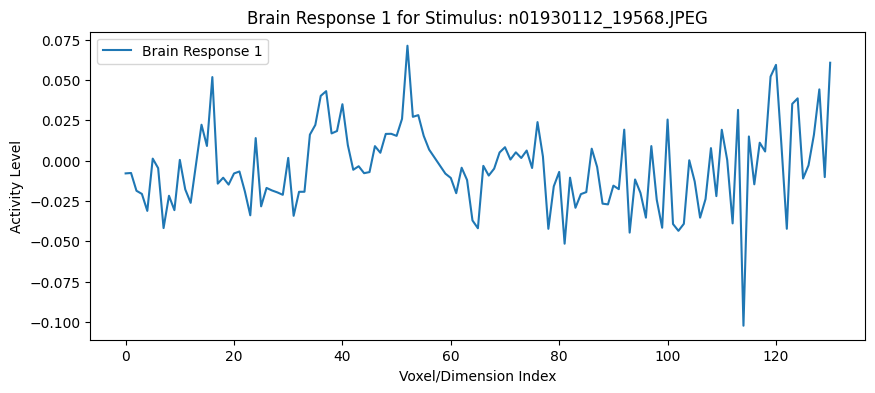

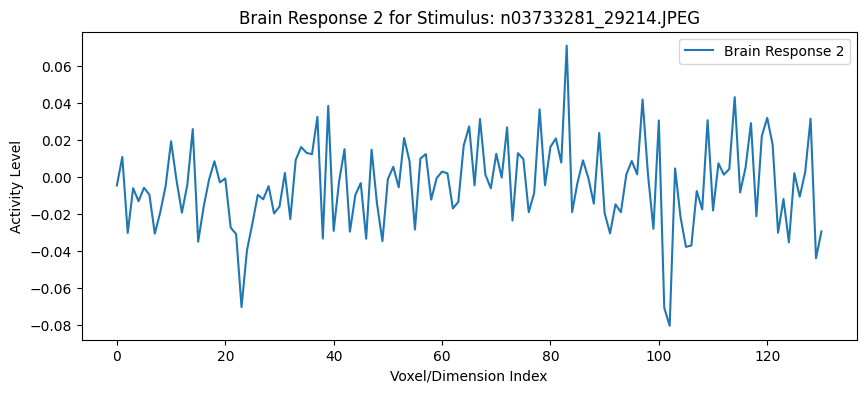

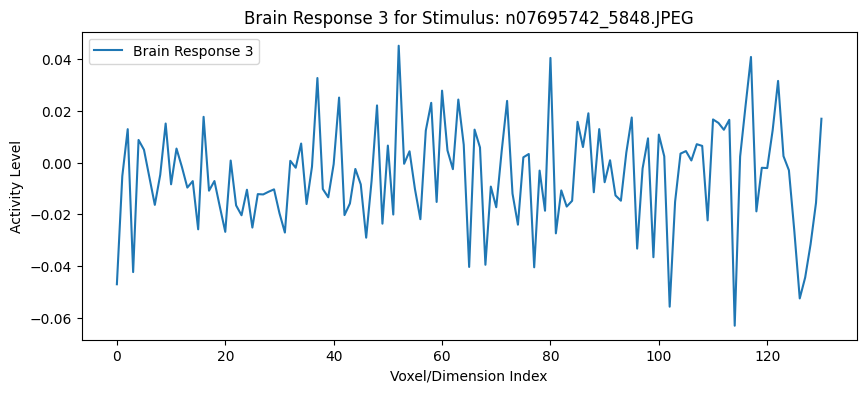

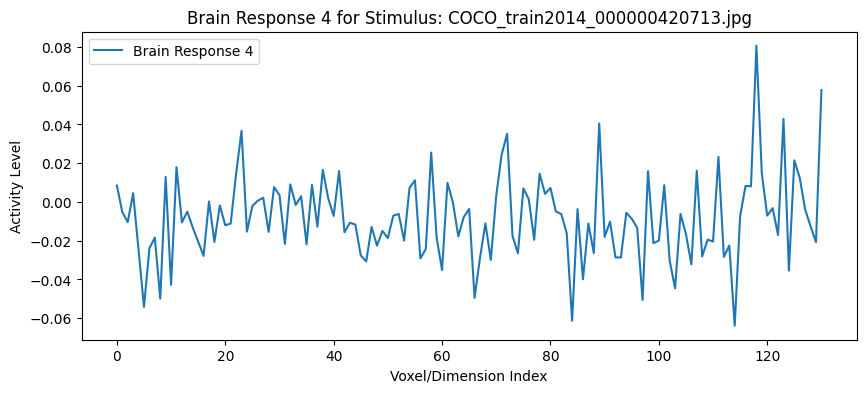

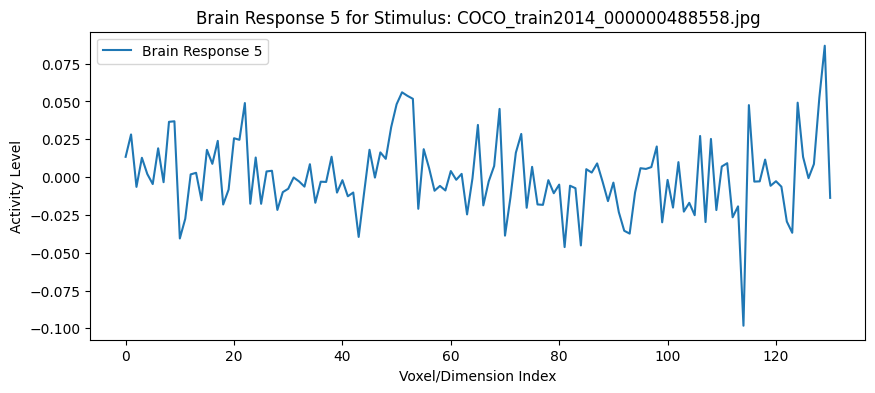

In [14]:
for i in range(5):
    plt.figure(figsize=(10, 4))
    plt.plot(lhppa_data[i], label=f'Brain Response {i+1}')
    plt.title(f'Brain Response {i+1} for Stimulus: {stimuli_list[i]}')
    plt.xlabel('Voxel/Dimension Index')
    plt.ylabel('Activity Level')
    plt.legend()
    plt.show()

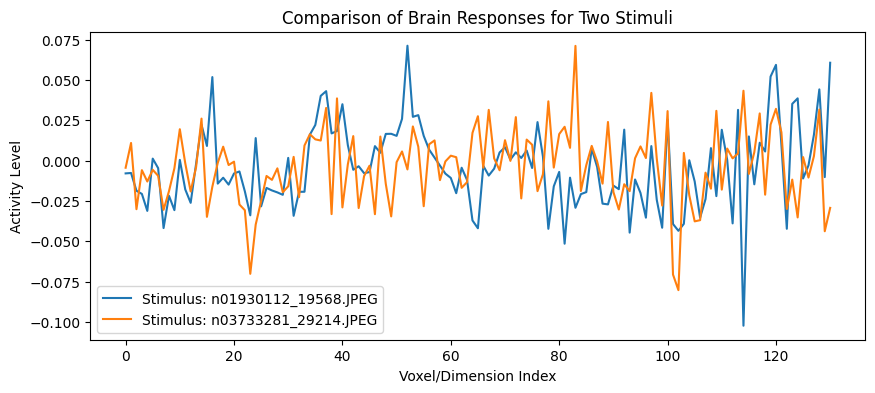

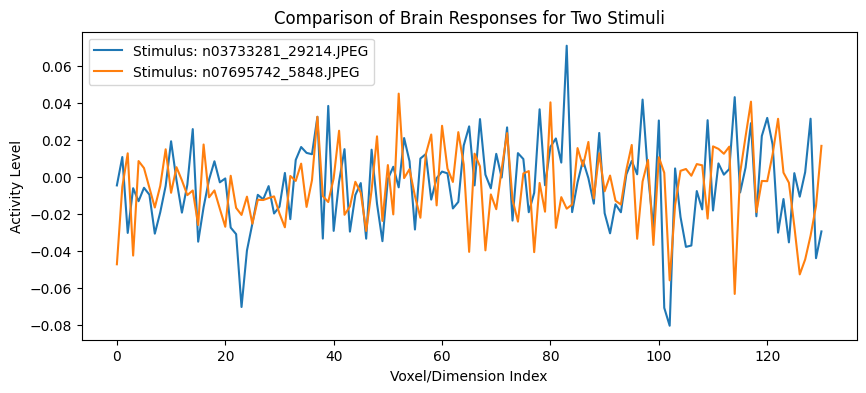

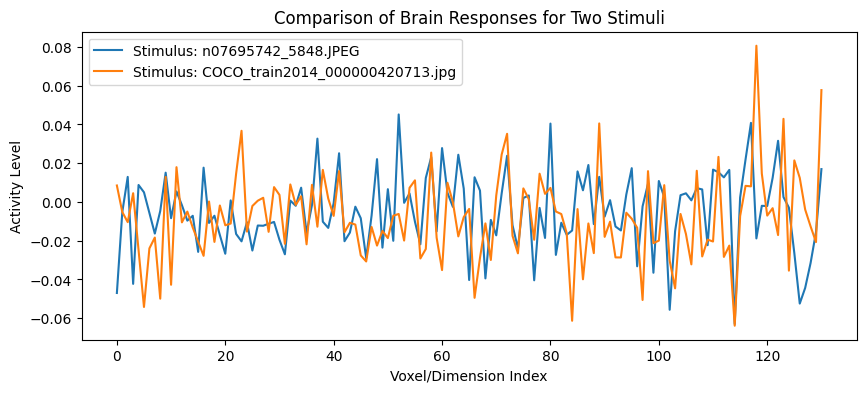

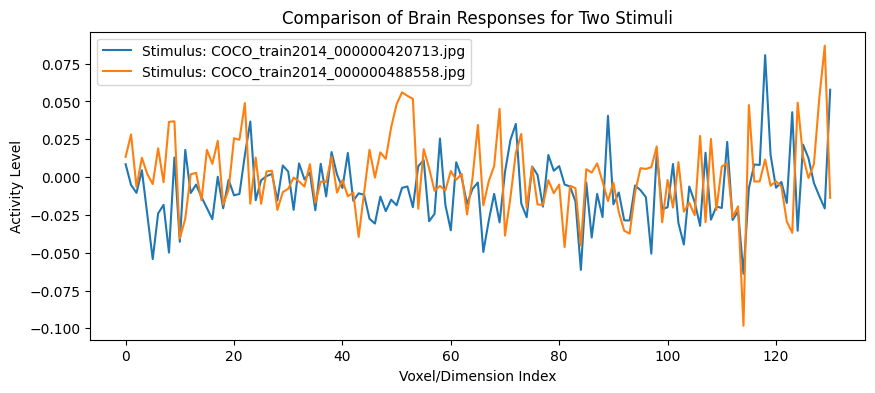

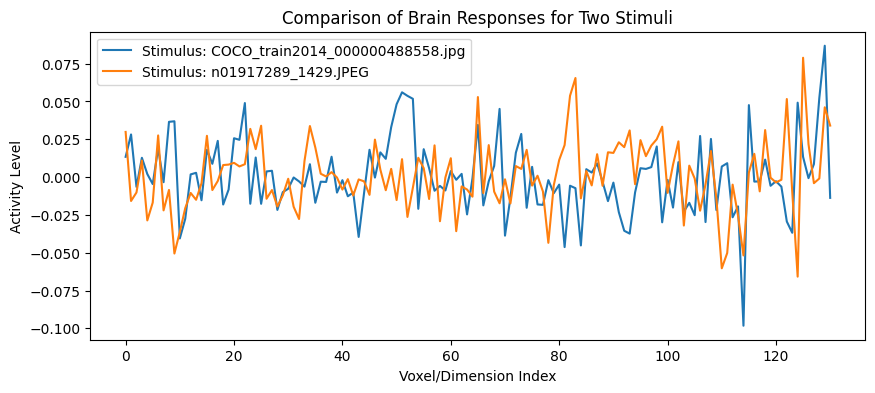

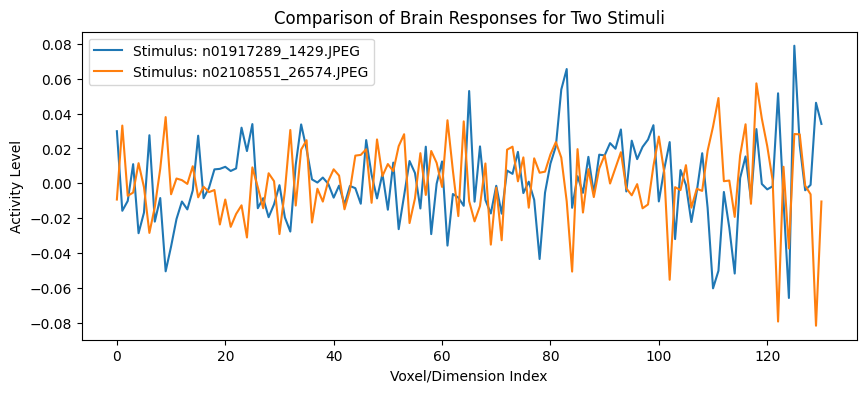

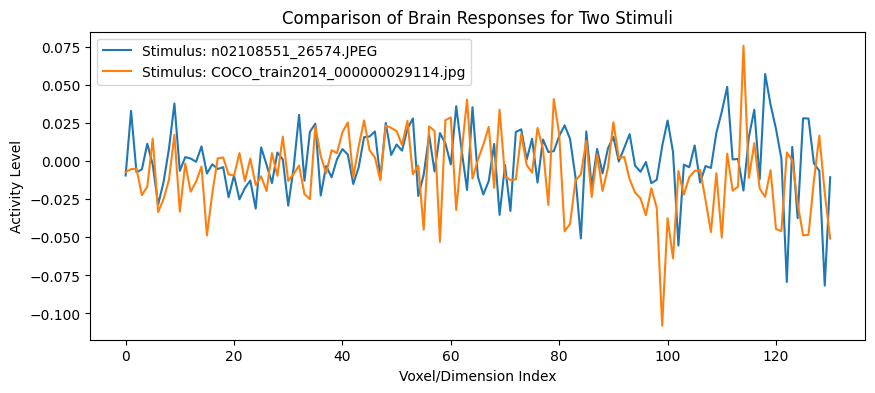

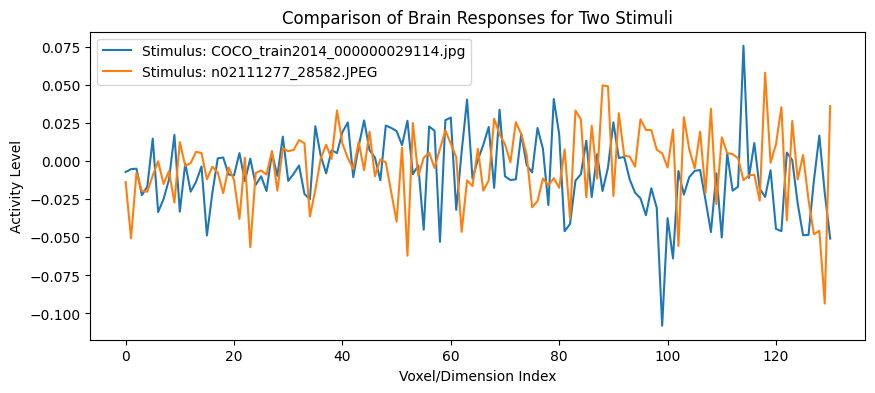

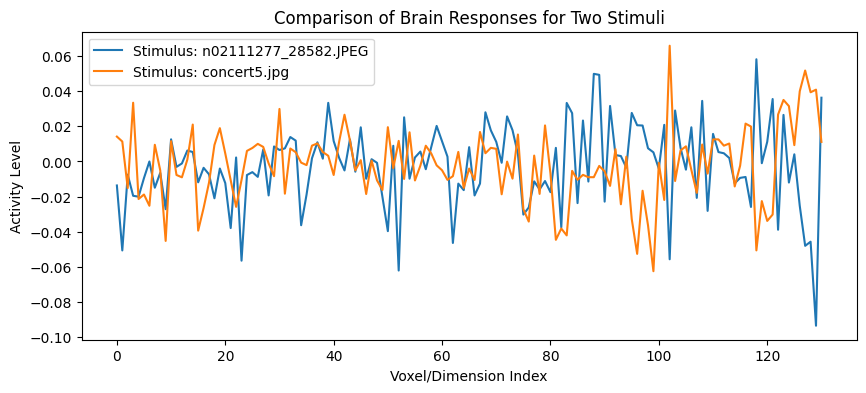

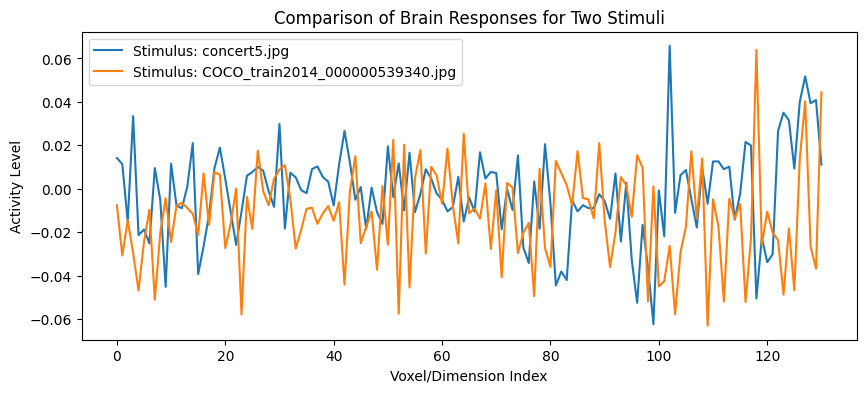

In [15]:
for i in range(0, 10):
  plt.figure(figsize=(10, 4))
  plt.plot(lhppa_data[i], label=f'Stimulus: {stimuli_list[i]}')
  plt.plot(lhppa_data[i+1], label=f'Stimulus: {stimuli_list[i+1]}')
  plt.title(f'Comparison of Brain Responses for Two Stimuli')
  plt.xlabel('Voxel/Dimension Index')
  plt.ylabel('Activity Level')
  plt.legend()
  plt.show()

# Get a statistical summary of the brain responses

In [16]:
import numpy as np

def summarize_brain_responses(brain_responses):
    """
    Prints a statistical summary of the brain responses.
    """
    mean_responses = np.mean(brain_responses, axis=0)
    std_responses = np.std(brain_responses, axis=0)
    min_responses = np.min(brain_responses, axis=0)
    max_responses = np.max(brain_responses, axis=0)

    print(f"Mean Brain Response (across all voxels): {mean_responses}")
    print(f"Std Deviation Brain Response: {std_responses}")
    print(f"Min Brain Response: {min_responses}")
    print(f"Max Brain Response: {max_responses}")

summarize_brain_responses(lhppa_data)


Mean Brain Response (across all voxels): [-7.24516211e-03 -3.15130276e-03 -8.44025356e-03 -1.26866756e-02
 -1.19213913e-02 -1.09985344e-02 -1.18833079e-02 -1.26578110e-02
 -1.65978537e-02 -1.27805603e-02 -2.36779946e-03 -2.23952322e-03
 -5.30519734e-03 -1.95453642e-03 -3.09089738e-03 -8.31747465e-03
 -8.32387783e-03 -3.56711600e-03 -4.33542716e-03 -6.08997636e-03
 -1.03198866e-02 -1.99573312e-03 -1.26103059e-02 -5.95243741e-03
 -6.79688441e-03 -6.05426102e-03 -1.37466251e-03 -1.01242214e-04
 -3.36431753e-03 -2.03237710e-03 -5.94619707e-05 -3.18601394e-03
 -2.40230095e-03 -3.42796885e-03 -4.92887437e-03 -6.30759357e-03
 -2.72006270e-03 -2.16554697e-03 -2.26141887e-03 -5.33434109e-03
 -2.19825843e-03 -3.08289798e-03 -1.40744974e-03 -1.70739189e-03
 -2.45397875e-03 -4.75394160e-03 -2.33506584e-03 -1.48979255e-03
 -4.63677917e-03 -3.09910001e-03 -2.06962698e-03 -2.21290945e-03
 -1.86234888e-03 -2.07008405e-03 -9.80944458e-04 -1.26064006e-03
 -1.93393424e-03 -2.33015197e-03 -7.02953752e-04 

# Plots a histogram of the brain response values to check distribution.

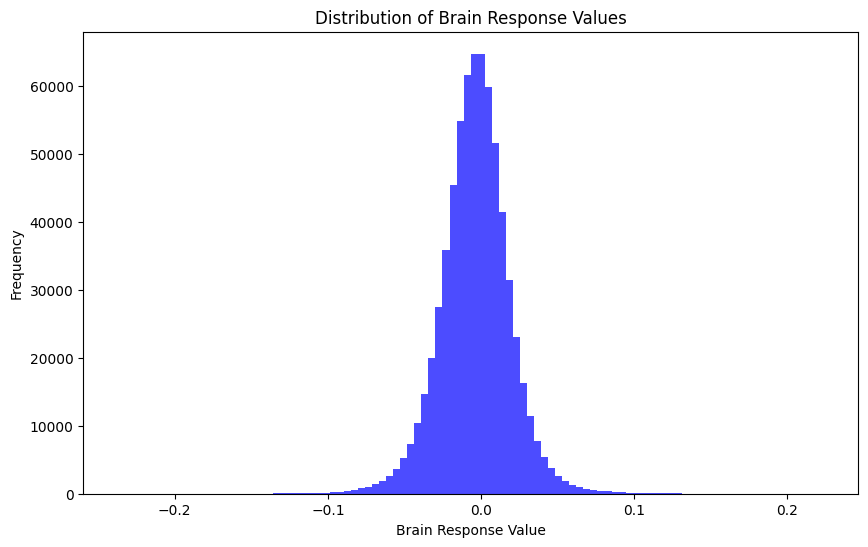

In [17]:
import matplotlib.pyplot as plt

def plot_brain_response_distribution(brain_responses):

    plt.figure(figsize=(10, 6))
    plt.hist(brain_responses.flatten(), bins=100, color='blue', alpha=0.7)
    plt.title('Distribution of Brain Response Values')
    plt.xlabel('Brain Response Value')
    plt.ylabel('Frequency')
    plt.show()

plot_brain_response_distribution(lhppa_data)


### Perform random sampling check

In [18]:
import random

def random_sampling_check(brain_responses, stimuli, num_samples=5):
    """
    Performs a random sampling check to align brain responses with stimuli.

    Parameters:
    brain_responses - numpy array of brain responses
    stimuli - list of stimuli names
    num_samples - number of random samples to check
    """
    sample_indices = random.sample(range(len(stimuli)), num_samples)

    for i in sample_indices:
        print(f"Brain Response {i+1}: {brain_responses[i][:5]}... (truncated)")
        print(f"Stimulus: {stimuli[i]}")
        print("------")

random_sampling_check(lhppa_data, stimuli_list, num_samples=5)


Brain Response 1107: [-0.02733136 -0.03371957 -0.01445354 -0.03138233 -0.03850018]... (truncated)
Stimulus: COCO_train2014_000000285460.jpg
------
Brain Response 5226: [-0.02076845  0.03461562 -0.03143583 -0.0294053  -0.05792055]... (truncated)
Stimulus: rep_library_aisle10.jpg
------
Brain Response 2252: [-0.032093   -0.01298553 -0.01111252 -0.04084114 -0.06414536]... (truncated)
Stimulus: bridalboutique2.jpg
------
Brain Response 131: [-0.00176261 -0.01911856  0.00110561 -0.00308591 -0.03403591]... (truncated)
Stimulus: COCO_train2014_000000135032.jpg
------
Brain Response 1114: [ 0.02576952  0.00130095 -0.03729937  0.02433853 -0.02484327]... (truncated)
Stimulus: n02002724_6339.JPEG
------


# Applies t-SNE to reduce dimensionality and visualizes the brain responses in 2D space.

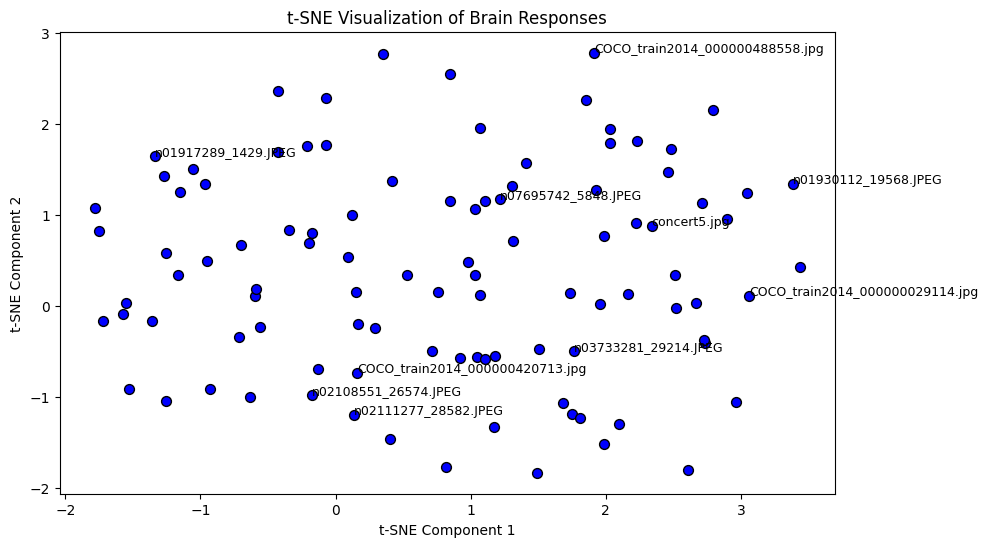

In [19]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def apply_tsne_and_plot(brain_responses, stimuli, num_samples=100):

    # Limit the number of samples to avoid computation overload (adjust as necessary)
    brain_responses_sampled = brain_responses[:num_samples]
    stimuli_sampled = stimuli[:num_samples]

    # Apply t-SNE to reduce to 2D
    tsne = TSNE(n_components=2, perplexity=50, random_state=42)
    brain_responses_tsne = tsne.fit_transform(brain_responses_sampled)

    # Plot the t-SNE reduced data
    plt.figure(figsize=(10, 6))
    plt.scatter(brain_responses_tsne[:, 0], brain_responses_tsne[:, 1], c='blue', edgecolor='k', s=50)

    # Optionally label a few points with the corresponding stimuli
    for i, stim in enumerate(stimuli_sampled[:10]):  # Label the first 10 points for reference
        plt.text(brain_responses_tsne[i, 0], brain_responses_tsne[i, 1], stim, fontsize=9)

    plt.title('t-SNE Visualization of Brain Responses')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()
    return brain_responses_tsne

# Apply t-SNE and plot for the first 100 brain responses
brain_responses_tsne = apply_tsne_and_plot(lhppa_data, stimuli_list, num_samples=100)


# Applies K-Means clustering to the 2D t-SNE data and visualizes the clusters.

In [20]:
from sklearn.cluster import KMeans
import numpy as np

def apply_kmeans_and_plot(brain_responses_tsne, num_clusters=3):

    # Apply K-Means to the t-SNE data
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(brain_responses_tsne)
    labels = kmeans.labels_

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(brain_responses_tsne[:, 0], brain_responses_tsne[:, 1],
                          c=labels, cmap='viridis', edgecolor='k', s=50)

    # Optionally label a few points with the corresponding stimuli
    for i, stim in enumerate(stimuli_list[:10]):  # Label first 10 points
        plt.text(brain_responses_tsne[i, 0], brain_responses_tsne[i, 1], stim, fontsize=9)

    plt.title(f'K-Means Clustering (K={num_clusters}) on t-SNE Reduced Data')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')

    # Add legend for clusters
    plt.colorbar(scatter)
    plt.show()
    return brain_responses_tsne

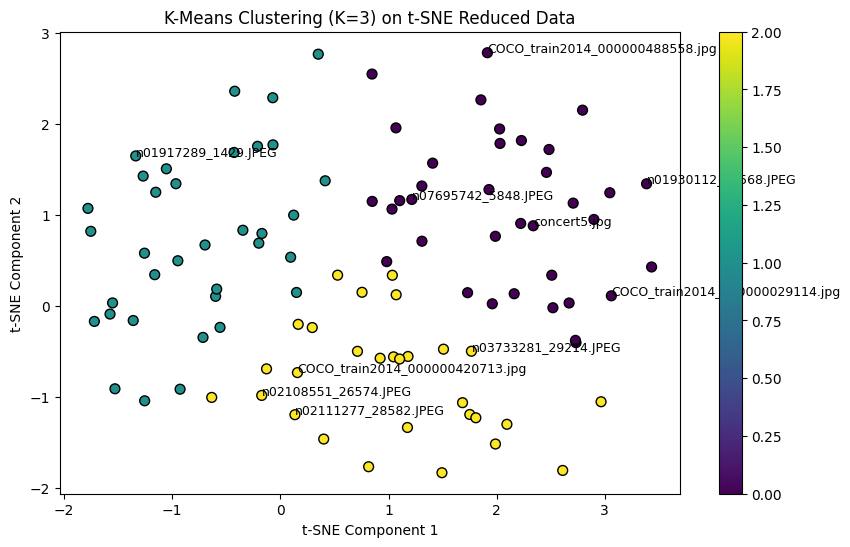

In [24]:
brain_responses_tsne = apply_kmeans_and_plot(brain_responses_tsne, num_clusters=3)

## Analyzes the stimuli assigned to each cluster and provides a detailed view of cluster contents.

## Plots the size of each cluster to visualize distribution of stimuli across clusters.


Cluster 0:
Number of stimuli: 36
Sample stimuli: ['n01930112_19568.JPEG', 'n07695742_5848.JPEG', 'COCO_train2014_000000488558.jpg', 'COCO_train2014_000000029114.jpg', 'concert5.jpg', 'COCO_train2014_000000176728.jpg', 'garbagedump3.jpg', 'track3.jpg', 'COCO_train2014_000000032271.jpg', 'COCO_train2014_000000285450.jpg']

Cluster 1:
Number of stimuli: 35
Sample stimuli: ['n01917289_1429.JPEG', 'fabricstore1.jpg', 'COCO_train2014_000000531657.jpg', 'n04099969_6395.JPEG', 'COCO_train2014_000000211198.jpg', 'n02747177_3947.JPEG', 'COCO_train2014_000000442793.jpg', 'n02655020_1972.JPEG', 'COCO_train2014_000000325346.jpg', 'elevatorOutside2.jpg']

Cluster 2:
Number of stimuli: 29
Sample stimuli: ['n03733281_29214.JPEG', 'COCO_train2014_000000420713.jpg', 'n02108551_26574.JPEG', 'n02111277_28582.JPEG', 'COCO_train2014_000000539340.jpg', 'COCO_train2014_000000431764.jpg', 'n04371430_12487.JPEG', 'n04286575_5757.JPEG', 'n02966193_63.JPEG', 'rep_n01641577_1229.JPEG']


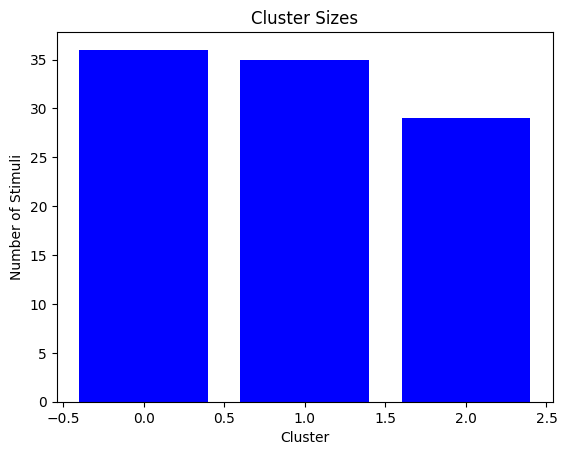

In [23]:
import matplotlib.pyplot as plt
from collections import Counter

def analyze_clusters(stimuli, labels, num_clusters):

    cluster_summary = {}

    # Group stimuli by cluster
    for cluster in range(num_clusters):
        cluster_stimuli = [stimuli[i] for i in range(len(stimuli)) if labels[i] == cluster]
        cluster_summary[cluster] = cluster_stimuli

        print(f"\nCluster {cluster}:")
        print(f"Number of stimuli: {len(cluster_stimuli)}")
        print(f"Sample stimuli: {cluster_stimuli[:10]}")  # Print a sample of 10 stimuli

    return cluster_summary

def plot_cluster_sizes(cluster_summary):

    cluster_sizes = [len(stimuli) for stimuli in cluster_summary.values()]
    plt.bar(range(len(cluster_sizes)), cluster_sizes, color='blue')
    plt.title('Cluster Sizes')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Stimuli')
    plt.show()

# Apply K-Means clustering and get labels
num_clusters = 3  # Adjust based on the clustering result
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(brain_responses_tsne)
labels = kmeans.labels_

# Perform detailed cluster analysis
cluster_summary = analyze_clusters(stimuli_list[:100], labels, num_clusters)

# Visualize the size of each cluster
plot_cluster_sizes(cluster_summary)


# Load the repeated stimuli list

In [25]:
with open('/content/drive/MyDrive/fMRI_Semantic/BOLD5000_Stimuli/Scene_Stimuli/repeated_stimuli_113_list.txt', 'r') as f:
    repeated_stimuli = f.readlines()

repeated_stimuli = [s.strip() for s in repeated_stimuli]

# Filter the repeated stimuli from the main stimuli list
unique_stimuli = [stim for stim in stimuli_list if stim not in repeated_stimuli]

print(f"Number of unique stimuli: {len(unique_stimuli)}")
print(f"Number of repeated stimuli: {len(repeated_stimuli)}")


Number of unique stimuli: 5141
Number of repeated stimuli: 113


In [26]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [27]:
!pip install torch==2.0.1 torchvision==0.15.2 --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 452.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lit: filename=lit-15.0.7-py3-none-any.whl size=89991 sha256=34e1d388304b7d65479baa3e9965ef073cfebfa9589f74729dd518afb79baf4b
  Stored in directory: /root/.cache/pip/wheels/27/2c/b6/3ed2983b1b44fe0dea1bb35234b09f2c22fb8ebb308679c922
Successfully built lit
  Attempting uninstall: torch
    Found existing installation: torch 2.5.0+cu121
    Uninstalling torch-2.5.0+cu121:
      Successfully uninstalled torch-2.5.0+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.20.0+cu121
    Uninstalling torchvision-0.20.0+cu121:


In [28]:
!pip install ftfy regex tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.8 MB/s eta 0:00:00


In [29]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-0pcqpwr2
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-0pcqpwr2
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369489 sha256=a25056d14ac51dac41b4b7f198f16de399488b40788f77480508b19d19117973
  Stored in directory: /tmp/pip-ephem-wheel-cache-n_8vn6nl/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [30]:
import os

In [31]:
directories = {
    "COCO": "/content/drive/MyDrive/fMRI_Semantic/BOLD5000_Stimuli/Scene_Stimuli/Presented_Stimuli/COCO",
    "ImageNet": "/content/drive/MyDrive/fMRI_Semantic/BOLD5000_Stimuli/Scene_Stimuli/Presented_Stimuli/ImageNet",
    "Scene": "/content/drive/MyDrive/fMRI_Semantic/BOLD5000_Stimuli/Scene_Stimuli/Presented_Stimuli/Scene"
}

In [32]:
def find_image_path(stimulus, directories):

    if stimulus.startswith("rep_"):
        stimulus = stimulus.replace("rep_", "")

    for dataset, path in directories.items():
        full_path = os.path.join(path, stimulus)
        if os.path.exists(full_path):
            return full_path
    return None  # If the image is not found in any folder

In [33]:
# Create a list of full image paths for the stimuli
image_paths = []
for stimulus in stimuli_list:
    full_image_path = find_image_path(stimulus, directories)
    if full_image_path:
        image_paths.append(full_image_path)
    else:
        print(f"Warning: Image {stimulus} not found in any folder")

print(f"First few image paths: {image_paths[:5]}")

First few image paths: ['/content/drive/MyDrive/fMRI_Semantic/BOLD5000_Stimuli/Scene_Stimuli/Presented_Stimuli/ImageNet/n01930112_19568.JPEG', '/content/drive/MyDrive/fMRI_Semantic/BOLD5000_Stimuli/Scene_Stimuli/Presented_Stimuli/ImageNet/n03733281_29214.JPEG', '/content/drive/MyDrive/fMRI_Semantic/BOLD5000_Stimuli/Scene_Stimuli/Presented_Stimuli/ImageNet/n07695742_5848.JPEG', '/content/drive/MyDrive/fMRI_Semantic/BOLD5000_Stimuli/Scene_Stimuli/Presented_Stimuli/COCO/COCO_train2014_000000420713.jpg', '/content/drive/MyDrive/fMRI_Semantic/BOLD5000_Stimuli/Scene_Stimuli/Presented_Stimuli/COCO/COCO_train2014_000000488558.jpg']


In [34]:
len(image_paths)

5254

In [35]:
import torch
import clip
from PIL import Image
import os
import numpy as np

In [36]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

100%|███████████████████████████████████████| 338M/338M [00:05<00:00, 62.6MiB/s]


# Extracting clip embeddings for all the stimulus and saving it to npy file

In [37]:
def extract_clip_embeddings(image_paths):
    image_embeddings = []

    for image_path in image_paths:
        try:
            # Load and preprocess the image
            image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)

            # Extract image features using CLIP
            with torch.no_grad():
                image_features = model.encode_image(image)

            # Append the image features to the list
            image_embeddings.append(image_features.cpu().numpy())

        except Exception as e:
            print(f"Error processing image {image_path}: {e}")

    return np.array(image_embeddings)

In [38]:
image_embeddings = extract_clip_embeddings(image_paths)

In [39]:
np.save("/content/drive/MyDrive/fMRI_Semantic/image_embeddings_cpu.npy", image_embeddings)

In [40]:
print(f"Generated {len(image_embeddings)} embeddings with shape {image_embeddings.shape}")

Generated 5254 embeddings with shape (5254, 1, 512)


In [41]:
image_embeddings = np.squeeze(image_embeddings)

# Check the corrected shape (should now be [5254, 512])
print(f"Corrected shape of image embeddings: {image_embeddings.shape}")

# Save the corrected embeddings to a file
np.save("/content/drive/MyDrive/fMRI_Semantic/corrected_image_embeddings_cpu.npy", image_embeddings)

Corrected shape of image embeddings: (5254, 512)


In [42]:
brain_response_data = lhppa_data
print(f"Brain response data shape: {brain_response_data.shape}")

Brain response data shape: (5254, 131)


In [43]:
brain_responses = torch.tensor(brain_response_data, dtype=torch.float32).to(device)
image_embeddings = torch.tensor(image_embeddings, dtype=torch.float32).to(device)

# Check shapes
print(f"Brain responses shape: {brain_responses.shape}")
print(f"Image embeddings shape: {image_embeddings.shape}")

Brain responses shape: torch.Size([5254, 131])
Image embeddings shape: torch.Size([5254, 512])


In [44]:
for param in model.parameters():
    param.requires_grad = False

In [45]:
import torch.nn as nn

# Advanced Projection Head

In [155]:
class AdvancedProjectionHead(nn.Module):
    def __init__(self, input_dim, output_dim=512):
        super(AdvancedProjectionHead, self).__init__()

        # Project the input to a dimension divisible by num_heads (e.g., 128)
        self.input_proj = nn.Linear(input_dim, 128)

        # Attention mechanism (embed_dim = 128, num_heads = 4)
        self.attention = nn.MultiheadAttention(embed_dim=128, num_heads=4)

        # Residual connection
        self.residual_fc = nn.Linear(128, output_dim)

        # Fully connected layers with increased capacity, batch normalization, and LeakyReLU activation
        self.fc = nn.Sequential(
            nn.Linear(128, 2048),              # Projected input
            nn.BatchNorm1d(2048),              # Batch Normalization
            nn.LeakyReLU(negative_slope=0.01), # LeakyReLU activation
            nn.Dropout(0.4),                   # Dropout for regularization
            nn.Linear(2048, 1024),             # Second wider layer
            nn.BatchNorm1d(1024),              # Batch Normalization
            nn.LeakyReLU(negative_slope=0.01), # LeakyReLU activation
            nn.Dropout(0.3),                   # Dropout for regularization
            nn.Linear(1024, output_dim),       # Final layer to match CLIP embedding size
            nn.BatchNorm1d(output_dim),        # Batch Normalization for output layer
        )

    def forward(self, x):
        # Project input dimension to 128 before attention
        x = self.input_proj(x)

        # Apply attention mechanism
        x, _ = self.attention(x, x, x)

        # Apply the fully connected layers
        residual = self.residual_fc(x)         # Residual connection
        x = self.fc(x)

        # Combine residual and projection outputs
        return x + residual

# CLIP-MUSED based attention block

[CLIP-MUSED AttentionBlock.py](https://github.com/CLIP-MUSED/CLIP-MUSED/blob/main/AttentionBlock.py)

In [46]:
from attention_block import Attention  # CLIP-MUSED AttentionBlock as attention_block.py

class AttentionProjectionHead(nn.Module):
    def __init__(self, input_dim, output_dim=512, heads=8, dim_head=64):
        super(AttentionProjectionHead, self).__init__()

        # Initial linear projection to match the input dimension for attention
        self.input_proj = nn.Linear(input_dim, dim_head * heads)

        # Use AttentionBlock from CLIP-MUSED
        self.attention = Attention(dim=dim_head * heads, heads=heads, dim_head=dim_head)

        # Residual connection after attention
        self.residual_fc = nn.Linear(dim_head * heads, output_dim)

        # Fully connected layers for projecting the output to CLIP embedding space
        self.fc = nn.Sequential(
            nn.Linear(dim_head * heads, 2048),
            nn.BatchNorm1d(2048),
            nn.GELU(),
            # nn.Dropout(0.4),
            nn.Linear(2048, 1024),
            nn.BatchNorm1d(1024),
            nn.GELU(),
            # nn.Dropout(0.3),
            nn.Linear(1024, output_dim),
            nn.BatchNorm1d(output_dim),
        )

    def forward(self, x):
        # Project input to appropriate dimension for attention
        x = self.input_proj(x)

        # Add sequence dimension if input is 2D, make it [batch_size, seq_len=1, embedding_dim]
        if x.dim() == 2:
            x = x.unsqueeze(1)  # Convert [batch_size, embedding_dim] -> [batch_size, seq_len=1, embedding_dim]

        # Apply attention mechanism
        x = self.attention(x)

        # Remove sequence dimension to make it compatible with fully connected layers
        x = x.squeeze(1)  # Convert back to [batch_size, embedding_dim]

        # Apply fully connected layers
        residual = self.residual_fc(x)
        x = self.fc(x)

        # Return the final output with residual connection
        return x + residual


In [69]:
input_dim = brain_responses.shape[1]  # The dimensionality of your brain response data
# projection_head = AdvancedProjectionHead(input_dim=input_dim, output_dim=512).to(device)
projection_head = AttentionProjectionHead(input_dim=input_dim, output_dim=512).to(device)

# InfoNCE Loss for contrastive learning

In [48]:
class InfoNCELoss(nn.Module):
    def __init__(self, temperature=0.1):
        super(InfoNCELoss, self).__init__()
        self.temperature = temperature
        self.criterion = nn.CrossEntropyLoss()

    def forward(self, brain_proj, image_proj):
        # Normalize the projections
        brain_proj = nn.functional.normalize(brain_proj, dim=1)
        image_proj = nn.functional.normalize(image_proj, dim=1)

        # Compute logits
        logits = torch.matmul(brain_proj, image_proj.T) / self.temperature

        # Generate labels (correct pairings)
        labels = torch.arange(logits.size(0)).to(device)

        # Apply cross-entropy loss
        loss = self.criterion(logits, labels)
        return loss

# Splitting the data to train, test and validation

In [115]:
from sklearn.model_selection import train_test_split

train_brain, test_brain, train_image, test_image = train_test_split(
    brain_responses, image_embeddings, test_size=0.3, random_state=42
)
val_brain, test_brain, val_image, test_image = train_test_split(
    test_brain, test_image, test_size=0.5, random_state=42
)

print(f"Training set size: {train_brain.size(0)}, Validation set size: {val_brain.size(0)}, Test set size: {test_brain.size(0)}")


Training set size: 3677, Validation set size: 788, Test set size: 789


input_proj.weight: grad norm = 1.2857487201690674
input_proj.bias: grad norm = 0.0037321660201996565
attention.to_qkv.weight: grad norm = 2.1350390911102295
attention.to_out.0.weight: grad norm = 1.9940900802612305
attention.to_out.0.bias: grad norm = 0.013114036060869694
residual_fc.weight: grad norm = 0.013948585838079453
residual_fc.bias: grad norm = 0.020347103476524353
fc.0.weight: grad norm = 2.112560987472534
fc.0.bias: grad norm = 5.971426799078472e-05
fc.1.weight: grad norm = 0.06536680459976196
fc.1.bias: grad norm = 0.08371157199144363
fc.3.weight: grad norm = 5.073019504547119
fc.3.bias: grad norm = 3.4034337659250014e-07
fc.4.weight: grad norm = 0.04390951246023178
fc.4.bias: grad norm = 0.04356472194194794
fc.6.weight: grad norm = 1.9407404661178589
fc.6.bias: grad norm = 7.01336162478583e-08
fc.7.weight: grad norm = 0.05946950986981392
fc.7.bias: grad norm = 0.020347101613879204
Epoch [1/50], Training Loss: 3.274397611618042, Validation Loss: 6.775668144226074
input_proj

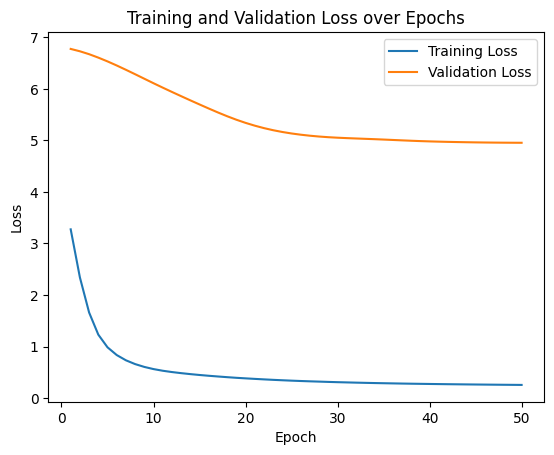

In [132]:
# Define optimizer and loss function
optimizer = torch.optim.Adam(projection_head.parameters(), lr=1e-4, weight_decay=1e-5)
contrastive_loss_fn = InfoNCELoss(temperature=0.05)

# Initialize lists to track losses
train_losses = []
val_losses = []

# Training loop
num_epochs = 50
best_val_loss = float('inf')
patience = 20
epochs_no_improve = 0

for epoch in range(num_epochs):
    projection_head.train()
    # Forward pass on train set
    noise = torch.randn_like(train_brain) * 0.001
    brain_proj = projection_head(train_brain + noise)
    train_loss = contrastive_loss_fn(brain_proj, train_image)

    optimizer.zero_grad()
    train_loss.backward()

    # Backpropagation
    for name, param in projection_head.named_parameters():
        if param.grad is not None:
            print(f"{name}: grad norm = {param.grad.norm().item()}")
        else:
            print(f"{name}: No gradient")

    optimizer.step()

    # Validation step
    projection_head.eval()
    with torch.no_grad():
        val_proj = projection_head(val_brain)
        val_loss = contrastive_loss_fn(val_proj, val_image)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=patience, factor=0.5)
    scheduler.step(val_loss)

    # Append losses
    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())

    print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss.item()}, Validation Loss: {val_loss.item()}")

    # Early stopping mechanism
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        torch.save(projection_head.state_dict(), "best_projection_head.pth")
    else:
        epochs_no_improve += 1

    if epochs_no_improve >= patience:
        print("Early stopping triggered")
        break

# Plot training and validation loss
epochs = range(1, len(train_losses) + 1)
plt.plot(epochs, train_losses, label="Training Loss")
plt.plot(epochs, val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss over Epochs")
plt.legend()
plt.show()

# Model Evaluation

In [133]:
projection_head.eval()

# Forward pass on test data (no gradient calculation needed)
with torch.no_grad():
    test_proj = projection_head(test_brain)

# Cosine Similarity between brain projection and image embeddings

In [134]:
import torch.nn.functional as F

# Compute cosine similarity between test brain projections and test image embeddings
cos_sim = F.cosine_similarity(test_proj, test_image, dim=-1)

# Average similarity score
avg_cos_sim = cos_sim.mean().item()
print(f"Average Cosine Similarity on Test Data: {avg_cos_sim}")

Average Cosine Similarity on Test Data: 0.16368317604064941


# Top-1 Accuracy

In [135]:
# For each test brain projection, find the closest image embedding (top-1 accuracy)
correct = 0
for i in range(len(test_proj)):
    # Find the index of the image embedding with the highest similarity to the brain projection
    closest_image_idx = torch.argmax(F.cosine_similarity(test_proj[i].unsqueeze(0), test_image, dim=-1))

    # Check if the closest image embedding matches the actual one (assumes one-to-one matching)
    if closest_image_idx == i:
        correct += 1

# Compute accuracy
test_accuracy = correct / len(test_proj)
print(f"Top-1 Accuracy on Test Data: {test_accuracy * 100:.2f}%")


Top-1 Accuracy on Test Data: 31.69%


# Test Accuracy

In [136]:
from sklearn.metrics.pairwise import cosine_similarity

# Get the projected brain embeddings for the test set
test_proj = test_proj.cpu().numpy()  # Convert to NumPy array if needed

# Get image embeddings for the test set
test_image_embeddings = test_image.cpu().numpy()

# Compute cosine similarities
similarities = cosine_similarity(test_proj, test_image_embeddings)

# For each brain response, find the closest image in the embedding space
closest_images = np.argmax(similarities, axis=1)

# Calculate how many times the closest image is the correct one
correct = 0
for i in range(len(closest_images)):
    if closest_images[i] == i:  # If the closest image matches the correct image
        correct += 1

accuracy = correct / len(closest_images)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 31.69%


# Projected brain embeddings

In [137]:
tsne = TSNE(n_components=2, random_state=42)
brain_proj_2d = tsne.fit_transform(test_proj)
image_emb_2d = tsne.fit_transform(test_image_embeddings)

# Plot each pair of brain response and image embeddings with a connecting line

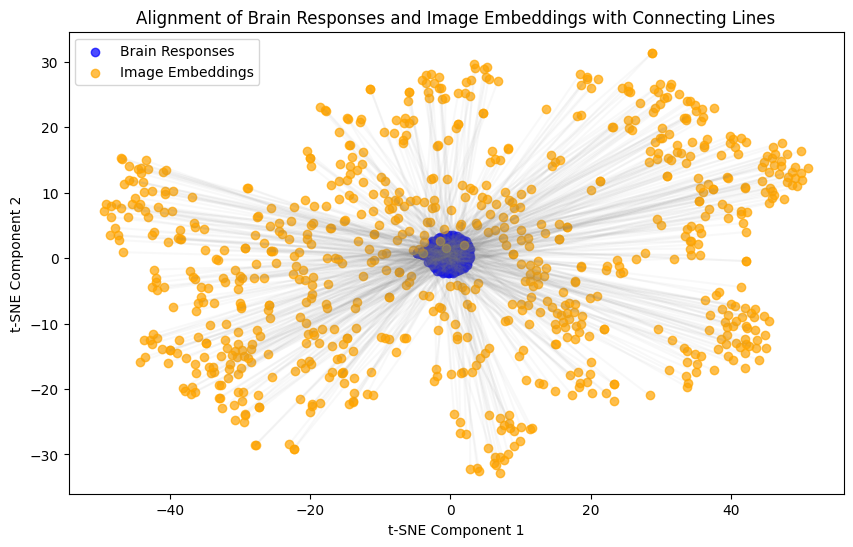

In [138]:
plt.figure(figsize=(10, 6))


for i in range(len(test_proj)):
    plt.plot([brain_proj_2d[i, 0], image_emb_2d[i, 0]],
             [brain_proj_2d[i, 1], image_emb_2d[i, 1]],
             'gray', alpha=0.05)  # Line between corresponding points

# Scatter plot the brain responses and image embeddings
plt.scatter(brain_proj_2d[:, 0], brain_proj_2d[:, 1], label="Brain Responses", alpha=0.7, color="blue")
plt.scatter(image_emb_2d[:, 0], image_emb_2d[:, 1], label="Image Embeddings", alpha=0.7, color="orange")

plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Alignment of Brain Responses and Image Embeddings with Connecting Lines")
plt.legend()
plt.show()